<a href="https://colab.research.google.com/github/zaynabzya/InsureTech-Predictor/blob/main/Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project # 01
#INSURANCE CHARGES

**Author :** Zaynab Zya

**Date and Time** 2/23/24 1:51 AM

**Contact** Zaynabzya@gmail.com
#Overview
This project focuses on predicting insurance charges using machine learning models, leveraging a dataset accessed from Google Drive. The analysis and model development are conducted in Python using libraries such as Pandas, Scikit-Learn, and Seaborn.
#Technologies
* **Python**: Core programming language for data manipulation and modeling.

* **Pandas**: Data manipulation library for loading, cleaning, and transforming the dataset.

* **Scikit-Learn**: Machine learning library providing regression models (LinearRegression, SVR, RandomForestRegressor), preprocessing tools (StandardScaler), evaluation metrics (mean_squared_error, mean_absolute_error, r2_score), and hyperparameter tuning (GridSearchCV).

* **Seaborn**: Statistical data visualization library used for creating distribution plots and heatmaps to explore data relationships.

* **Google Colab**: Cloud-based Jupyter notebook environment utilized for computational resources and integration with Google Drive.

* **GridSearchCV**: Utility from Scikit-Learn for optimizing model hyperparameters through systematic cross-validation.

#Hurdles Faced

* Categorical Variable Encoding: Ensuring accurate encoding of categorical variables (sex, smoker, region) posed challenges in preserving meaningful data relationships.
* Model Selection: Choosing appropriate models and optimizing hyperparameters using GridSearchCV demanded significant computational resources and iterative testing.




##Steps Involved
**Data Loading and Initial Exploration**


---



Google Drive is mounted to access the dataset (insurance.csv).
Initial exploration includes obtaining basic information about the dataset, such as its dimensions and column details.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [ ]:
file_path = '/content/drive/My Drive/PROJECTS/Regression/insurance.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
print("The row count of the dataset : {}".format(df.shape[0]))
print("The column count of the dataset : {}".format(df.shape[1]))

The row count of the dataset : 1338
The column count of the dataset : 7


In [ ]:
info = [
    ["No.", "Column", "Non-Null Count", "Dtype"]
] + [
    [i, col, df[col].count(), df[col].dtype] for i, col in enumerate(df.columns)
]
print(tabulate(info, headers="firstrow", tablefmt="fancy_grid"))


╒═══════╤══════════╤══════════════════╤═════════╕
│   No. │ Column   │   Non-Null Count │ Dtype   │
╞═══════╪══════════╪══════════════════╪═════════╡
│     0 │ age      │             1338 │ int64   │
├───────┼──────────┼──────────────────┼─────────┤
│     1 │ sex      │             1338 │ object  │
├───────┼──────────┼──────────────────┼─────────┤
│     2 │ bmi      │             1338 │ float64 │
├───────┼──────────┼──────────────────┼─────────┤
│     3 │ children │             1338 │ int64   │
├───────┼──────────┼──────────────────┼─────────┤
│     4 │ smoker   │             1338 │ object  │
├───────┼──────────┼──────────────────┼─────────┤
│     5 │ region   │             1338 │ object  │
├───────┼──────────┼──────────────────┼─────────┤
│     6 │ charges  │             1338 │ float64 │
╘═══════╧══════════╧══════════════════╧═════════╛


In [ ]:
memory_usage = df.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemory Usage: {memory_usage:.2f} MB")


Memory Usage: 0.28 MB


In [ ]:
info = [
    ["No.", "Column", "Null Count"]
] + [
    [i, col, df[col].isnull().sum()] for i, col in enumerate(df.columns)
]

# Step 6: Display the DataFrame info using tabulate
print(tabulate(info, headers="firstrow", tablefmt="fancy_grid"))

╒═══════╤══════════╤══════════════╕
│   No. │ Column   │   Null Count │
╞═══════╪══════════╪══════════════╡
│     0 │ age      │            0 │
├───────┼──────────┼──────────────┤
│     1 │ sex      │            0 │
├───────┼──────────┼──────────────┤
│     2 │ bmi      │            0 │
├───────┼──────────┼──────────────┤
│     3 │ children │            0 │
├───────┼──────────┼──────────────┤
│     4 │ smoker   │            0 │
├───────┼──────────┼──────────────┤
│     5 │ region   │            0 │
├───────┼──────────┼──────────────┤
│     6 │ charges  │            0 │
╘═══════╧══════════╧══════════════╛


##Data Cleaning and Preprocessing


---



* Data cleaning involves handling missing values and removing duplicates from the dataset.
* Categorical variables (sex, smoker, region) are encoded numerically using LabelEncoder.
* Exploratory data analysis (EDA) techniques, including correlation heatmaps and distribution plots, are used to understand data relationships.

In [ ]:
summary_stats = df.describe()
df.duplicated().sum()

1

In [ ]:
# @title

# Print summary statistics in a tabular format
print(tabulate(summary_stats, headers="keys", tablefmt="fancy_grid"))

╒═══════╤══════════╤════════════╤════════════╤═══════════╕
│       │      age │        bmi │   children │   charges │
╞═══════╪══════════╪════════════╪════════════╪═══════════╡
│ count │ 1338     │ 1338       │ 1338       │   1338    │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ mean  │   39.207 │   30.6634  │    1.09492 │  13270.4  │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ std   │   14.05  │    6.09819 │    1.20549 │  12110    │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ min   │   18     │   15.96    │    0       │   1121.87 │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ 25%   │   27     │   26.2963  │    0       │   4740.29 │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ 50%   │   39     │   30.4     │    1       │   9382.03 │
├───────┼──────────┼────────────┼────────────┼───────────┤
│ 75%   │   51     │   34.6938  │    2       │  16639.9  │
├───────┼──────────┼────────────┼────────────┼──────────

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

print(tabulate(sex_counts, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═════════╕
│    │ Sex    │   Count │
╞════╪════════╪═════════╡
│  0 │ male   │     675 │
├────┼────────┼─────────┤
│  1 │ female │     662 │
╘════╧════════╧═════════╛


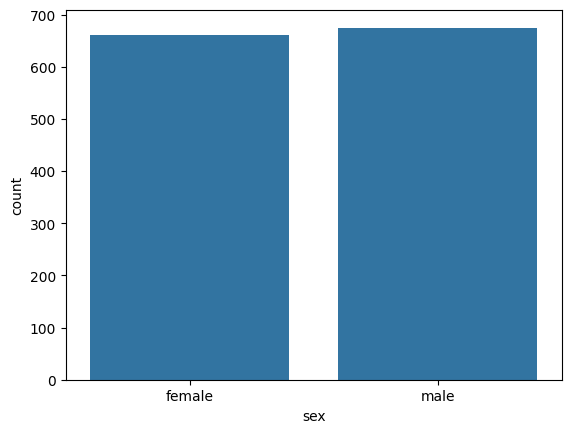

In [ ]:
sns.countplot(x='sex', data=df)
plt.show()

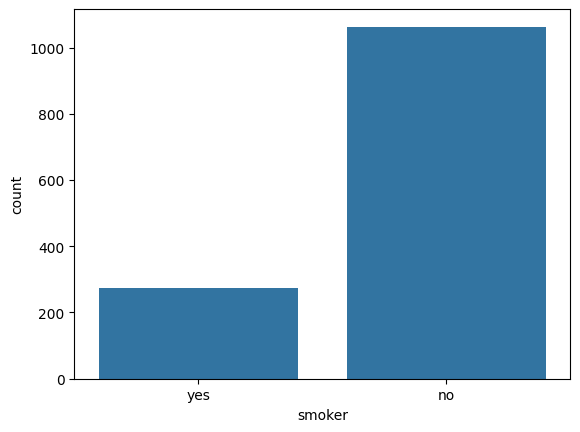

In [ ]:
sns.countplot(x='smoker', data=df)
plt.show()

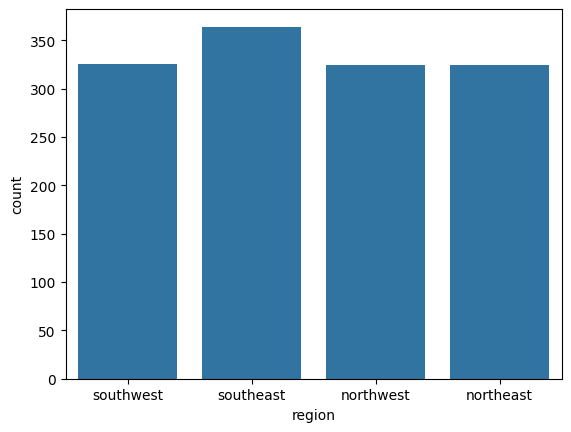

In [ ]:
sns.countplot(x='region', data=df)
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
labelencounter= preprocessing.LabelEncoder()
df['sex']= labelencounter.fit_transform(df['sex'])
df['smoker']= labelencounter.fit_transform(df['smoker'])
df['region']= labelencounter.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
correlation =df.corr()
correlation


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


##Exploratory Data Analysis (EDA)


---


* Seaborn is utilized to visualize the distributions of variables like age and BMI.
* Scatter plots are employed to analyze relationships between independent variables and the target variable (charges).

<Axes: >

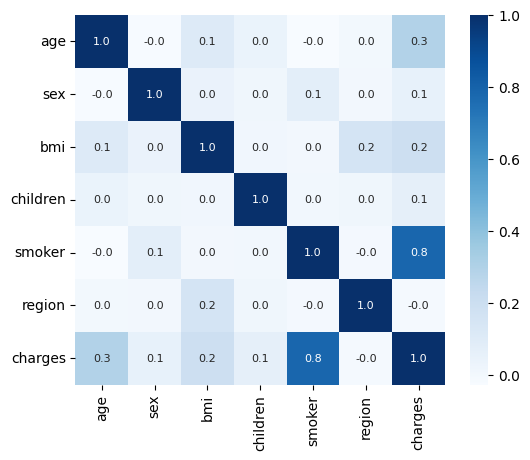

In [ ]:
sns.heatmap(correlation , cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

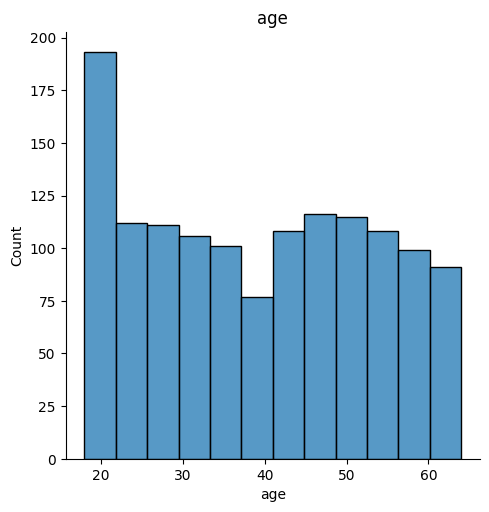

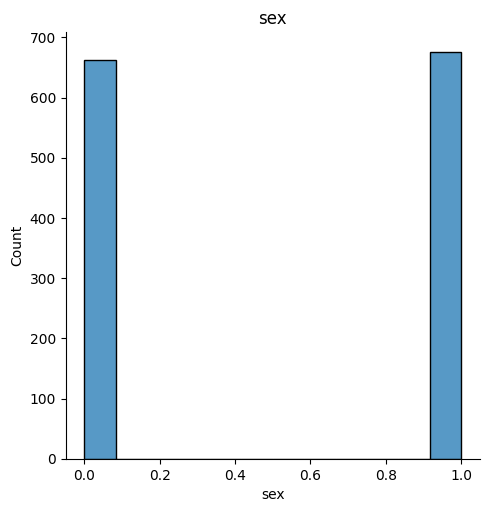

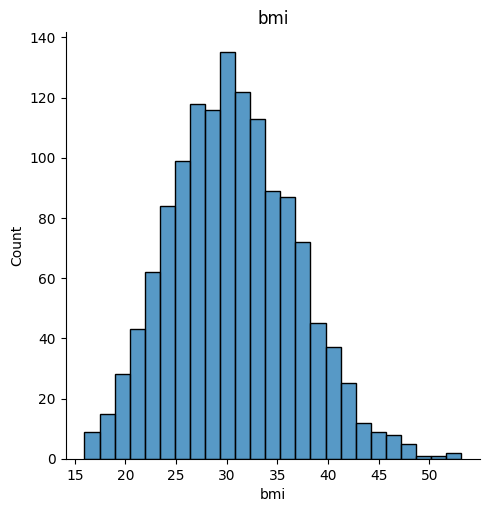

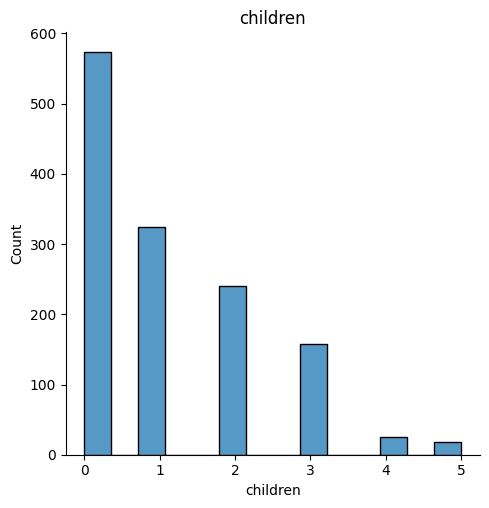

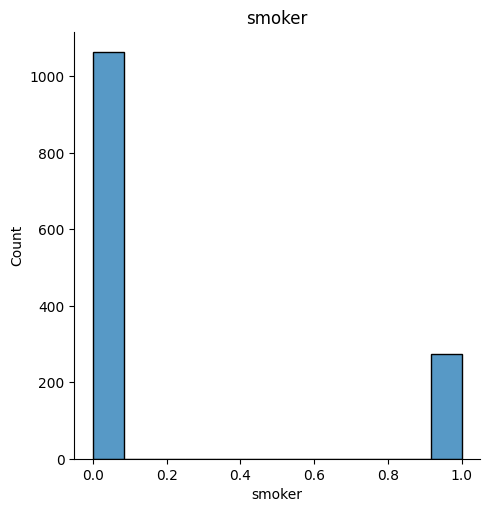

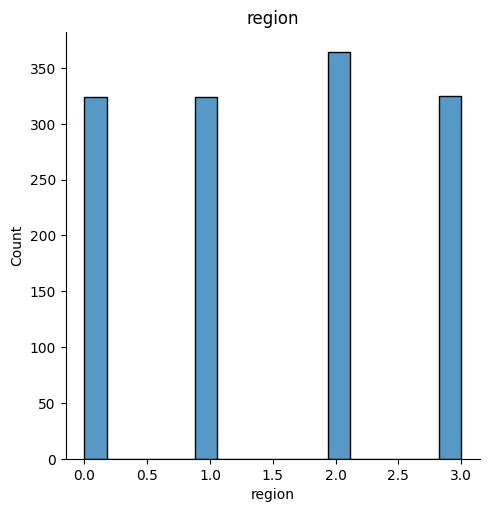

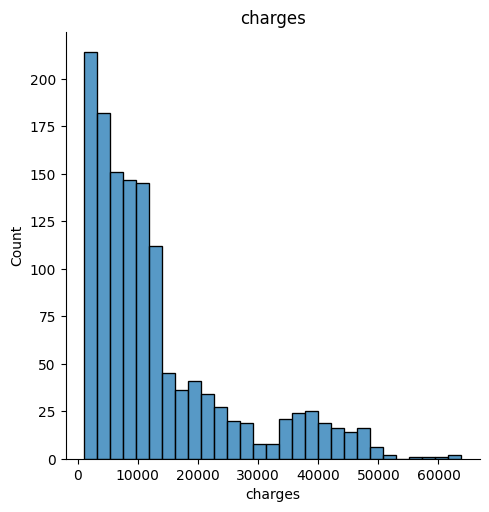

In [ ]:
for i in df.columns:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

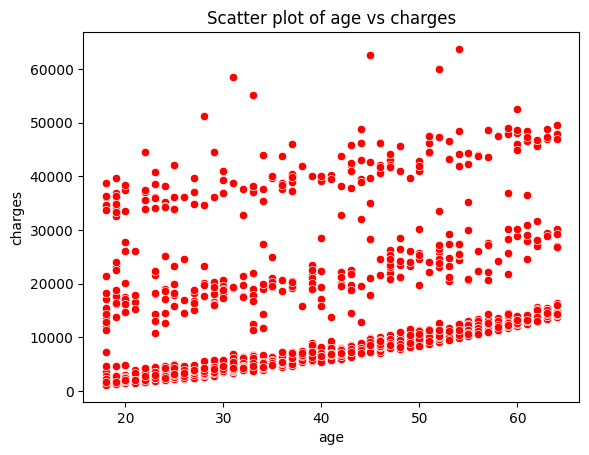

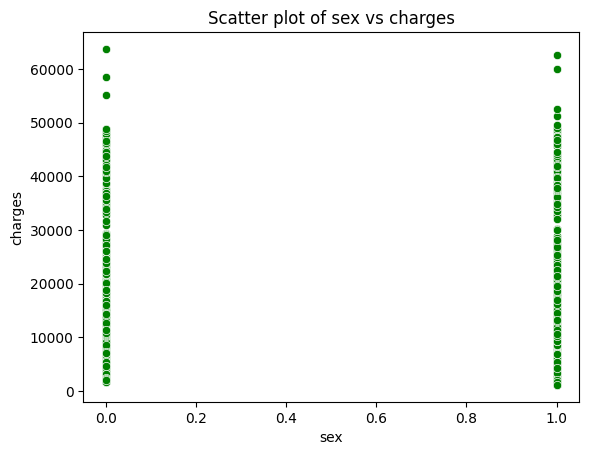

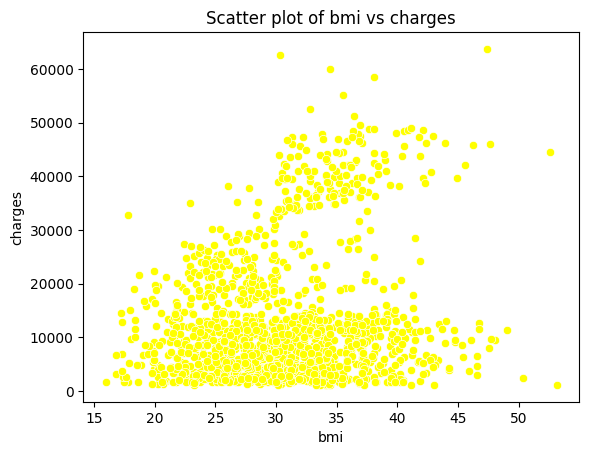

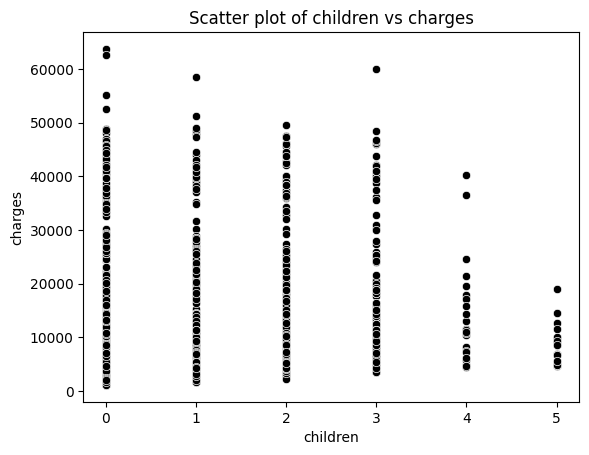

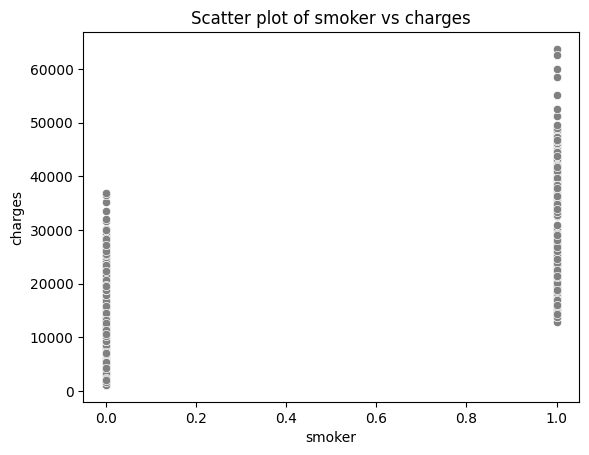

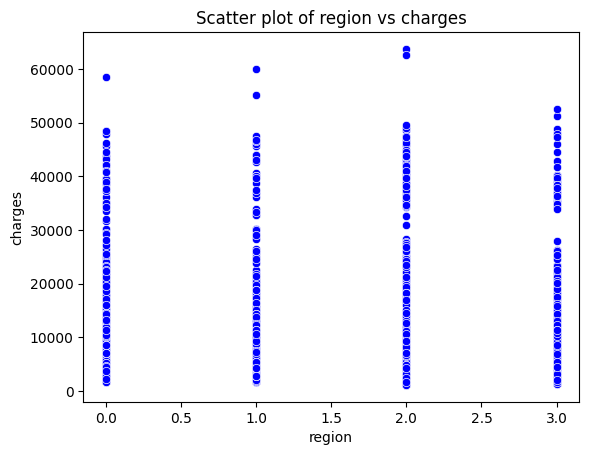

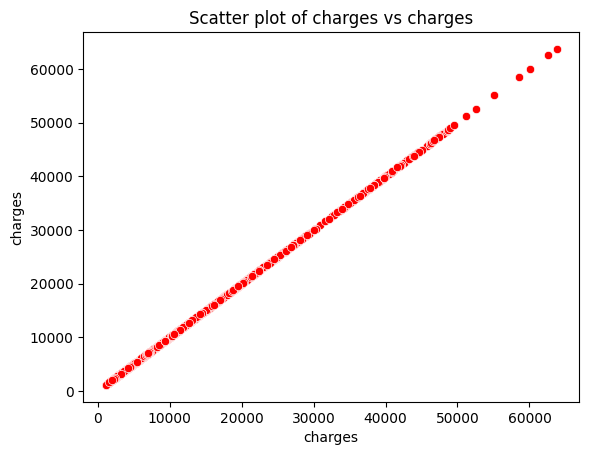

In [ ]:
colorsforx = ["Red","Green","Yellow","Black","Grey","blue"]
num_colors = len(colorsforx)
colorchanger = 0

for i in df.columns:
    sns.scatterplot(data=df, x=i, y="charges", color=colorsforx[colorchanger % num_colors])
    plt.title(f'Scatter plot of {i} vs charges')
    plt.show()
    colorchanger += 1

#Model Training and Evaluation

* The dataset is split into training and testing sets using train_test_split from Scikit-Learn.
* Numerical features are standardized using StandardScaler to ensure optimal model performance.
* Multiple regression models (Linear Regression, SVR, Random Forest Regressor) are trained and evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.
* Hyperparameter tuning is performed using GridSearchCV to find the best parameters for each model.

In [ ]:
x= df[["age","sex","bmi","children","smoker","region"]]
y= df[("charges")]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
def modelresult(prediction):
    print("Mean Squared Error:", mean_squared_error(y_test, prediction))
    print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
    print("R-squared:", r2_score(y_test, prediction))


In [ ]:
ir = LinearRegression()
ir.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
predsir = ir.predict(x_test_scaled)
modelresult(predsir)


Mean Squared Error: 40431756.87618857
Mean Absolute Error: 4427.560035535579
R-squared: 0.7404532519935141


In [ ]:
svrmodel = SVR()
param_grid = {'C': [0.001, 0.01, 0.1 , 0.5 , 1], 'kernel' : ['linear' , 'rbf' ,'poly'],'gamma' : ['scale' , 'auto'],'degree' : [2,3,4,5], }
gridsvr = GridSearchCV(svrmodel, param_grid, cv=5)
gridsvr.fit(x_train_scaled, y_train)
print(gridsvr.best_params_)
print(gridsvr.best_score_)
print(gridsvr.score(x_test_scaled, y_test))

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
-0.03317866136564325
-0.030212971838076808


In [ ]:
predsirsvr = gridsvr.predict(x_test_scaled)
modelresult(predsirsvr)

Mean Squared Error: 160484848.02056515
Mean Absolute Error: 8177.211156983577
R-squared: -0.030212971838076808


In [ ]:
rfrmodel = RandomForestRegressor()
param_gridrfr = {'bootstrap': [True] ,'n_estimators': [2,3,4,5,6,7,8,9,10], 'max_depth': [5 , 10 ,15], 'max_features': ["auto", "sqrt", "log2"]}
gridrfr = GridSearchCV(rfrmodel, param_gridrfr, cv=5)
gridrfr.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
predsirrfr = gridsvr.predict(x_test_scaled)
modelresult(predsirrfr)

Mean Squared Error: 160484848.02056515
Mean Absolute Error: 8177.211156983577
R-squared: -0.030212971838076808


In [ ]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
columniterate = 1
for index in x.columns:
  mean = df[index].mean()
  print(f"Mean of {index}: {mean}")
  columniterate += 1

Mean of age: 39.222139117427076
Mean of sex: 0.5048616305160808
Mean of bmi: 30.66345175766642
Mean of children: 1.0957367240089753
Mean of smoker: 0.2049364248317128
Mean of region: 1.5160807778608825


In [ ]:
newcustomer = np.array([39,0,30,1,0 ,1])


In [ ]:
gridrfr.predict(newcustomer.reshape(1, -1))

array([18474.56916336])

In [ ]:
print("the insurance cost of new customer is {}".format(gridrfr.predict(newcustomer.reshape(1, -1))[0]))

the insurance cost of new customer is 18474.569163355027


#Conclusion
This project demonstrates a structured approach to predicting insurance charges through thorough data preprocessing, exploratory analysis, and machine learning modeling. Despite challenges in data cleaning and model selection, leveraging Python's robust libraries and Google Colab's collaborative environment facilitated effective problem-solving and model optimization. The project highlights the application of machine learning techniques in real-world scenarios, emphasizing the importance of data quality and algorithm selection in achieving accurate predictions.